## Introduction

This project will analyse data from the National Park Service about endangered species in different parks. The questions intended to answer will be:
* What is the distribution of conservation status across for species?
* Are certain species more likely to be endangered than others?
* Is there a significant difference between species and their conservation status?
* Which animal is the most prevalent and what is their distribution across the parks?

Data for this project is stored in observations.csv and species_info.csv, provided by Codecademy.

### Import Modules

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from itertools import chain
import string

%matplotlib inline

### Loading the Data

The data is contained within 2 csv files that will be read into DataFrames.

In [2]:
obs = pd.read_csv('observations.csv')
species = pd.read_csv('species_info.csv')

In [3]:
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


The obs DataFrame contains the number of sightings of each specie of animal and has 3 columns:
* scientific_name - The name of the specie of animal
* park_name - The name of the park the animal was seen
* observations - The number of times the animal was seen in that park in the last 7 days

In [4]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


The species DataFrame contains information about each specie of animal and has 4 columns:
* category - The category the animal is in
* scientific_name - The anmials scientific name
* common_name - The name commonly used for the animal
* conservation_status - The conservation status of the animal

### Explore the Data

We can now explore the DataFrames in more depth to get a real understanding of what we are working with.

In [5]:
print(f'There are {species.scientific_name.nunique()} different species of animal in the data.')

There are 5541 different species of animal in the data.


In [6]:
print(f'There are {obs.park_name.nunique()} different parks in the data and the names of the parks are:\n{obs.park_name.unique()}')

There are 4 different parks in the data and the names of the parks are:
['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [7]:
print(f'There are {species.category.nunique()} categories in the data and the categories of animal are:\n{species.category.unique()}')

There are 7 categories in the data and the categories of animal are:
['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


We now know there are many different species in the data and these species were spotted across 4 different parks. We also know there are 5 different categories of animal and 2 categories of plant.

In [8]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

Here we can that Vascualar Plant has the most different species and makes up the bulk of the species observed. The Reptile has the least.

#### What is the distribution of conservation status across for species?

In [9]:
print(f'There are {species.conservation_status.nunique()} categories of conservation status and the different statuses are:\n{species.conservation_status.unique()}')

There are 4 categories of conservation status and the different statuses are:
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


Each species is given a conservation status: species of concern, endangered, threatened and in recovery. There are also some species marked with nan, this means those species are not under any conservation status.

In [10]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

Having nan in the conservation_status column isn't good practice so we'll change these out for 'No Intervention'.

In [11]:
species.conservation_status.fillna('No Intervention', inplace=True)

In [12]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


In [13]:
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

### Analysis

To begin our analyis we will first look at how the conservation status is broke down by animal category.

In [14]:
conservation_category = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category'])['scientific_name'].count().unstack()
conservation_category

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


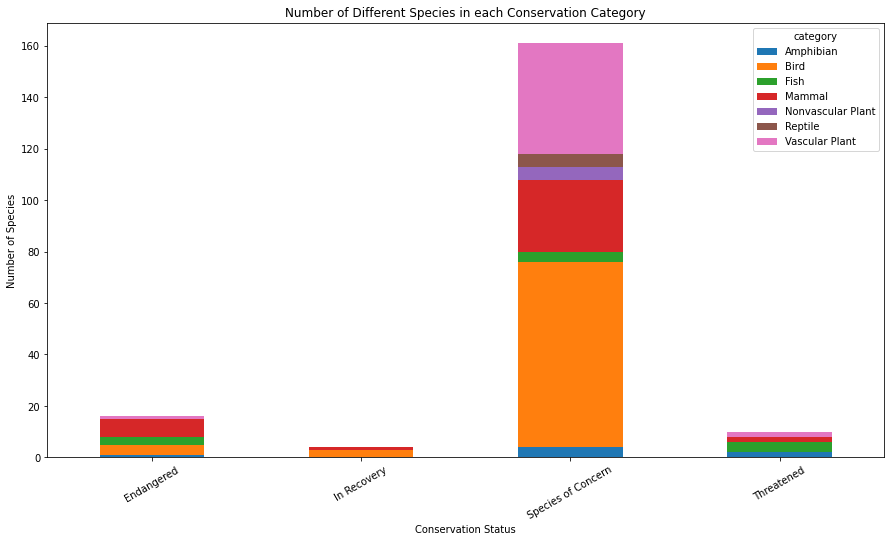

In [15]:
ax = conservation_category.plot(kind='bar', figsize=(15,8), stacked=True)
ax.set_xticklabels(['Endangered', 'In Recovery', 'Species of Concern', 'Threatened'], rotation=30)
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
ax.set_title('Number of Different Species in each Conservation Category')
plt.show()

From this we can see that 'species of concern' are the most prevalent and within that group birds are of the most concern. The least amount of animals are in the 'in recovery' conservation status. We can also see that amphibians are the least common animal to have a conservation status. 

#### Are certain species more likely to be endangered than others?
We now want to find out which animals are more likely to be endangered than others, to begin we will create a new column called 'is_protected', which will contain all animals with a conservation status other than 'No Intervention'.

In [16]:
species['is_protected'] = species.conservation_status != 'No Intervention'

In [17]:
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [18]:
cat_counts = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index()\
            .pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
cat_counts.columns = ['Category', 'Not Protected', 'Protected']
cat_counts['Percent Protected'] = round(cat_counts['Protected'] / (cat_counts['Protected'] + cat_counts['Not Protected'])\
                                    * 100, 2)
cat_counts

,Category,Not Protected,Protected,Percent Protected
0,Amphibian,72,7,8.86
1,Bird,413,75,15.37
2,Fish,115,11,8.73
3,Mammal,146,30,17.05
4,Nonvascular Plant,328,5,1.50
5,Reptile,73,5,6.41
6,Vascular Plant,4216,46,1.08


We now have a much simpler view of what category of animals are protected or not protected, we can also see the percent protected to make for a better comparison. For example about 15% of birds are protected and about 6% of reptiles are protected, indicating a higher share of birds are endangered than reptiles.

#### Is there a significant difference between species and their conservation status?
We want to know if there is a significant difference between animals being protected, to test this we will use a Chi Squared Contingency test.

The first to categories we are going to test is birds vs mammals:

In [19]:
cont1 = [[413, 75],
        [146, 30]]
chi2, p, dof, ex = chi2_contingency(cont1)
p

0.6875948096661336

The test statistic calculated was 0.69, using a confidence interval of 0.05 we can see that the statistic is larger than this confidence interval. Therefore, there is not a significant difference between number of birds that are protected and the number of mammals and so they are independant.

The next test we are going to perform is for mammals and reptiles:

In [20]:
cont2 = [[146, 30],
        [73, 5]]
ch2, p, dof, ex = chi2_contingency(cont2)
p

0.03835559022969898

The test statistic calculated this time is 0.04, again using a confidence interval of 0.05, we can see that the test statistic is less than the confidence interval. Therefore, there was a significant difference between the protected status of mammals and reptiles. Mammals have a significantly larger chance of being protected than reptiles.

#### Which animal is the most prevalent and what is their distribution across the parks?
For our next analysis will we use the data in observations to find how the distribution of species differs accross the national parks.

To begin we need to create a function that will remove any punctuation in the common_names column within the species DataFrame. We will then remove any duplicate words so they aren't counted more than once. Finally, we will be able to count the occurances of each word.

In [22]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

In [44]:
common_Names = species[species.category == 'Mammal'].common_names.apply(remove_punctuations).str.split().tolist()
common_Names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [26]:
cleanRows = []

for item in common_Names:
    item = list(dict.fromkeys(item))
    cleanRows.append(item)
    
cleanRows[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

In [43]:
res = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in cleanRows))
res[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

In [42]:
words_counted = []

for i in res:
    x = res.count(i)
    words_counted.append((i, x))
    
pd.DataFrame(set(words_counted), columns=['Word', 'Count']).sort_values('Count', ascending=False).head(10)

,Word,Count
29,Bat,23
6,Shrew,18
141,Myotis,17
125,Mouse,16
105,Chipmunk,13
3,American,12
178,Squirrel,12
88,Vole,11
22,Eastern,11
200,Western,10


We can now see that the word Bat occured 23 times as a common name in species, Shrew occured 18 times and so on.

There are different types of scientific names for different types of Bats, so we need to figure out which rows in species are referring to Bats. To do this we will create a new column with a bool.

In [32]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)

species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Now we know which species is a Bat, we will merge the 'is_bat' DataFrame with the observation DataFrame.

In [33]:
bat_obs = obs.merge(species[species.is_bat])
bat_obs

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True
...,...,...,...,...,...,...,...,...
139,Myotis sodalis,Yellowstone National Park,68,Mammal,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
140,Myotis leibii,Yosemite National Park,132,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
141,Myotis leibii,Bryce National Park,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
142,Myotis leibii,Great Smoky Mountains National Park,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True


In [36]:
bat_obs.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


The table above shows us the number of observations of Bats at each National Park.

In [38]:
obs_by_park = bat_obs.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
obs_by_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


The table above now shows us the number of observations of Bat in each park broken up by their conservation status.

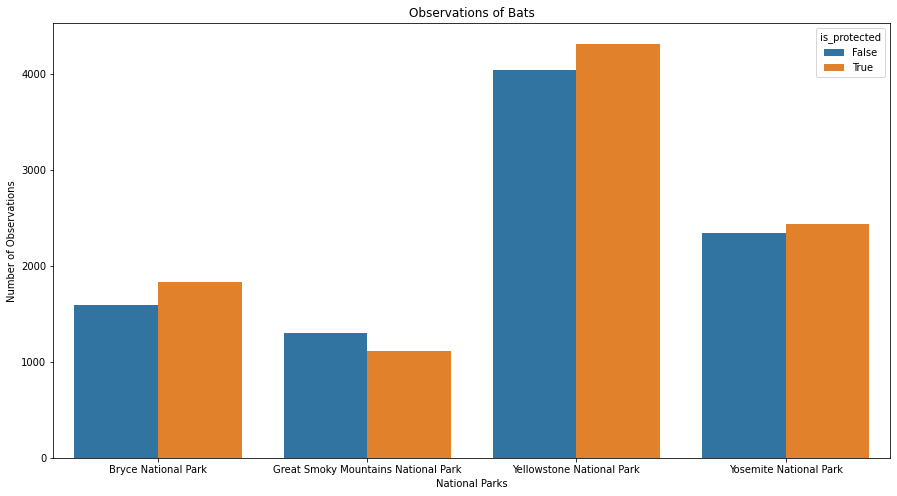

In [40]:
plt.figure(figsize=(15, 8))
sns.barplot(x=obs_by_park.park_name, y=obs_by_park.observations, hue=obs_by_park.is_protected)
plt.xlabel('National Parks')
plt.ylabel('Number of Observations')
plt.title('Observations of Bats')
plt.show()

The above plot gives us a visual representation of the number of observed bats at the four National Parks, split by whether they are protected or not. 

We can see that the Yellowstone National Park has the most observations of Bats and also has the most observations of protected Bats.

### Conclusion

In this project I have attempted to answer four questions about the data of species observed from four different National Parks:

* What is the distribution of conservation status across for species?
    * The majority of species are do not have a protected status (5633 not protected, 191 protected)
* Are certain species more likely to be endangered than others?
    * Mammals and birds were the most likley to be in protection (17.05% of mammals were protected, 15.37% of birds were protected)
* Is there a significant difference between species and their conservation status?
    * We calculated a Chi2 contingency to see if there was a statistical significance between the protection status of mammals and birds, and mammals and reptiles. We found that there was no significance between mammals and birds, but there was a significance between mammals and reptiles.
* Which animal is the most prevalent and what is their distribution across the parks?
    * We found that Bats were the most prevalent animal observed in the four national parks and that they were mostly observed in the Yellowstone National Park.